In [1]:
# Short toy notebook for studying helper functions from B. Brzycki.

import numpy as np
import setigen as stg
from astropy import units as u
import blimpy as bl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats
from astropy.stats import sigma_clip
#import blscint as bs
%matplotlib inline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [2]:
filename = '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5'
filename = '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5' # [5]
filename = '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5'

fb = bl.Waterfall(filename)

freqs, full_dynamic_spectrum = fb.grab_data()

dat_filename = '/datax/scratch/benjb/m31_l_data/' + filename[44:-2] + 'dat'

df = pd.read_table(dat_filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

ctr_freqs = df['Uncorrected_Frequency'].values
drifts = df['Drift_Rate'].values

In [41]:
filename = '/datax/scratch/benjb/m31_observation_with_setigen.fil'

fb = bl.Waterfall(filename)

freqs, full_dynamic_spectrum = fb.grab_data()

In [3]:
def threshold_baseline_bounds(spec, p=0.01):
    """
    Create bounds based on integrated intensity on either side of the central
    peak, as a fraction of the peak integrated intensity. Uses a 1D fit to the
    noise baseline.
    
    Parameters
    ----------
    spec : ndarray
        Intensity spectra
    p : float, optional
        Fraction of peak, used to set left and right bounds
        
    Returns
    -------
    l : int
        Left bound
    r : int
        Right bound
    metadata : dict
        Dictionary with metadata. Contains noise mean and spectra maximum,
        which are used to normalize spec to the spectra maximum.
    """
    noise_spec = sigma_clip(spec, masked=True)
    x = np.arange(len(spec))

    coeffs = np.polyfit(x[~noise_spec.mask], noise_spec[~noise_spec.mask], 1)
    poly = np.poly1d(coeffs)
    
    spec = spec - poly(x)
    norm_spec = (spec ) / (np.max(spec) )
    
    cutoffs = np.where(norm_spec < p)[0]
    
    peak = np.argmax(norm_spec)
    i = np.digitize(peak, cutoffs) - 1
    # print(i, i+1, len(cutoffs), len(spec), cutoffs[-1])
    l, r = cutoffs[i] + 1, cutoffs[i + 1]
    
    metadata = {
        'noise_mean': np.mean(noise_spec),
        'spec_max': np.max(spec)
    }
    return l, r, metadata

In [4]:
caleb_wl = 0.0027

delta_f = 2.7939677238464355

sigbws = []

#ctr_freqs = np.array([1620.125632, 1598.326308, 1548.437656])
#drifts = np.array([-2.479634, 1.000017, 1.949013])

for ii, freq in enumerate(ctr_freqs):

    #if (freq < 1590) or (freq > 1610):
    #    print(f'Not in satellite band; rejected.')
    #    continue

    if np.abs(drifts[ii]) > 3:  # ad hoc fix for some widths extending outside the 2.7-kHz window (mainly satellites)
        caleb_wl = 0.0054
    else:
        caleb_wl = 0.0027

    print(f'#{ii} of {len(ctr_freqs)}')

    dynamic_spectrum = full_dynamic_spectrum[:,np.where((freqs < freq+caleb_wl/2) & (freqs > freq-caleb_wl/2))[0]]



    frame = stg.Frame.from_data(df=delta_f*u.Hz,
                            dt=18.253611008*u.s,
                            fch1=(freq-caleb_wl/2)*u.MHz,
                            ascending=True, # fch1 is a minimum
                            data=dynamic_spectrum)
    
    #print(drifts[ii])
    dd_fr = stg.dedrift(frame, -drifts[ii]) # not sure why the negative is needed, but it works for me

    spec = stg.integrate(dd_fr)

    l, r, _ = threshold_baseline_bounds(spec)

    signal_bw = (float(r)-float(l))*delta_f
    sigbws.append(signal_bw)

    #break


#frame.plot(use_db=True)

#dd_fr.plot(use_db=True)
#print(f'{signal_bw} Hz')

#0 of 3009
#1 of 3009
#2 of 3009
#3 of 3009
#4 of 3009
#5 of 3009
#6 of 3009
#7 of 3009
#8 of 3009
#9 of 3009
#10 of 3009
#11 of 3009
#12 of 3009
#13 of 3009
#14 of 3009
#15 of 3009
#16 of 3009
#17 of 3009
#18 of 3009
#19 of 3009
#20 of 3009
#21 of 3009
#22 of 3009
#23 of 3009
#24 of 3009
#25 of 3009
#26 of 3009
#27 of 3009
#28 of 3009
#29 of 3009
#30 of 3009
#31 of 3009
#32 of 3009
#33 of 3009
#34 of 3009
#35 of 3009
#36 of 3009
#37 of 3009
#38 of 3009
#39 of 3009
#40 of 3009
#41 of 3009
#42 of 3009
#43 of 3009
#44 of 3009
#45 of 3009
#46 of 3009
#47 of 3009
#48 of 3009
#49 of 3009
#50 of 3009
#51 of 3009
#52 of 3009
#53 of 3009
#54 of 3009
#55 of 3009
#56 of 3009
#57 of 3009
#58 of 3009
#59 of 3009
#60 of 3009
#61 of 3009
#62 of 3009
#63 of 3009
#64 of 3009
#65 of 3009
#66 of 3009
#67 of 3009
#68 of 3009
#69 of 3009
#70 of 3009
#71 of 3009
#72 of 3009
#73 of 3009
#74 of 3009
#75 of 3009
#76 of 3009
#77 of 3009
#78 of 3009
#79 of 3009
#80 of 3009
#81 of 3009
#82 of 3009
#83 of 3009
#8

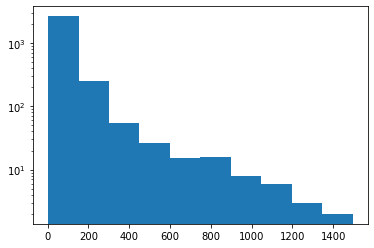

In [8]:
plt.hist(sigbws)
plt.yscale('log')
plt.show()

In [6]:
np.savez('/datax/scratch/benjb/HIP2792_signal_bws.npz', sigbws)

In [ ]:
def dedrift(fr, drift_rate=None):
    
    """
    Dedrift frame with a provided drift rate, or with the "drift_rate"
    keyword in the frame's metadata. This function dedrifts with respect
    to the center of the frame, so signals at the edges may get cut off.
    
    Parameters
    ----------
    fr : Frame
        Input frame
    drift_rate : float, optional
        Drift rate in Hz/s
        
    Returns
    -------
    dr_fr : Frame
        De-drifted frame
    """

    if drift_rate is None:
        if 'drift_rate' in fr.metadata:
            drift_rate = fr.metadata['drift_rate']
        else:
            raise KeyError('Please specify a drift rate to account for')
            
    # Calculate maximum pixel offset and raise an exception if necessary
    max_offset = int(np.round(abs(drift_rate) * fr.tchans * fr.dt / fr.df))
    if max_offset >= fr.fchans:
        raise ValueError(f'The provided drift rate ({drift_rate:.2f} Hz/s) ' 
                         f'is too high for the frame dimensions')
    tr_data = np.zeros((fr.data.shape[0], fr.data.shape[1] - max_offset))

    for i in range(fr.tchans):
        offset = int(np.round(abs(drift_rate) * i * fr.dt / fr.df))
        if drift_rate >= 0:
            start_idx = 0 + offset
            end_idx = start_idx + tr_data.shape[1]
        else:
            end_idx = fr.data.shape[1] - offset
            start_idx = end_idx - tr_data.shape[1]
        tr_data[i] = fr.data[i, start_idx:end_idx]
        
    # Match frequency to truncated fr
    if fr.ascending:
        if drift_rate >= 0:
            fch1 = fr.fs[0]
        else:
            fch1 = fr.fs[max_offset]
    else:
        if drift_rate >= 0:
            fch1 = fr.fs[::-1][max_offset]
        else:
            fch1 = fr.fs[::-1][0]
        
    dd_fr = Frame.from_data(fr.df, 
                            fr.dt, 
                            fch1, 
                            fr.ascending,
                            tr_data,
                            metadata=fr.metadata,
                            waterfall=fr.check_waterfall())
#     if dd_fr.waterfall is not None and 'source_name' in dd_fr.waterfall.header:
#         dd_fr.waterfall.header['source_name'] += '_dedrifted'
    return dd_fr